<a href="https://colab.research.google.com/github/andinivarianti/QuadraInnovators/blob/main/Final_Project_Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Analytics: Job Change of Data Scientists

**Group 4 Quadra Innovators**

*   Irza Nanda Herdian (Bussiness / Data Analyst)
*   Andini Varianti Putri (Project Manager)
*    (Data Scientist)
*   Muhammad Naufal Zaidan (Data Engineer)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df = pd.read_csv("aug_train.csv")

## 1. DESCRIBE DATA

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

**Features**
* enrollee_id : Unique ID for candidate.
* city: City code.
* city_ development _index : Developement index of the city (scaled).
* gender: Gender of candidate
* relevent_experience: Relevant experience of candidate
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate
* major_discipline :Education major discipline of candidate
* experience: Candidate total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* last_new_job: Difference in years between previous job and current job
* training_hours: training hours completed
* target: 0 – Not looking for job change, 1 – Looking for a job change



In [ ]:
df.shape

(19158, 14)

In [ ]:
df.isnull().sum() #check missing values

,0
enrollee_id,0
city,0
city_development_index,0
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [ ]:
df.nunique() #Checking for Unique Values

,0
enrollee_id,19158
city,123
city_development_index,93
gender,3
relevent_experience,2
enrolled_university,3
education_level,5
major_discipline,6
experience,22
company_size,8


In [ ]:
unique_gender_values = df['gender'].unique()
print(unique_gender_values)

['Male' nan 'Female' 'Other']


In [ ]:
df.duplicated().sum() #Checking for Duplicate Values

0

In [ ]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


## 2. UNIVARIATE ANALYSIS

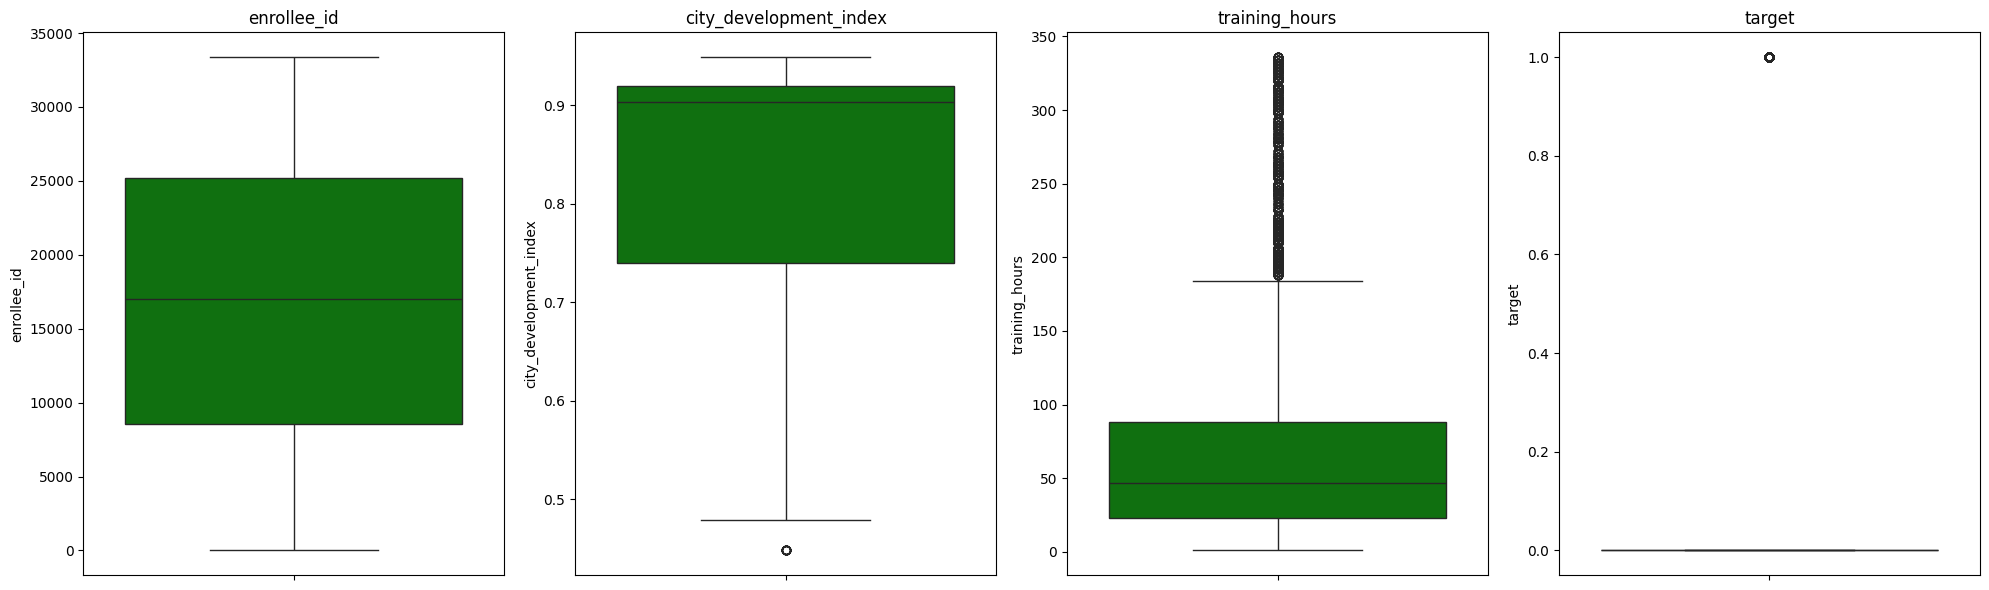

In [ ]:
# Identify numerical columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features = [col for col in numerical_features if col != 'enrollee_id	']

# Plot individual boxplots for numerical features
plt.figure(figsize=(20, 6))
for i in range(len(numerical_features)):
    plt.subplot(1, len(numerical_features), i+1)
    sns.boxplot(y=df[numerical_features[i]], color='green', orient='v')
    plt.title(numerical_features[i])
plt.tight_layout()

In [ ]:
## Function to Plot Bar Graph
def plot_bar_graph(column, order=None):
    x = df[column].value_counts().index
    y = df[column].value_counts().values
    sns.barplot(x=x, y=y, order=order)

# Funtion to Plot Pie Chart
def plot_pie_chart(column, title=''):
    values = df[column].value_counts().values
    labels = df[column].value_counts().index
    plt.figure(figsize=(6,6))
    plt.title(title)
    plt.pie(x=values, labels=labels, autopct='%1.2f%%')

**Candidate Looking for Job Change**
* 0 = Not looking for job change
* 1 = Looking for a job change

<ipython-input-13-702d6f2445a5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette=['blue', 'orange'])


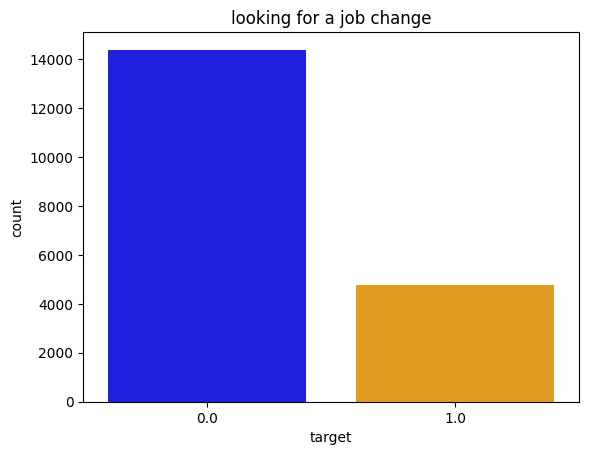

In [ ]:
sns.countplot(x='target', data=df, palette=['blue', 'orange'])
plt.title("looking for a job change")
plt.show()

**Training hours completed**

In [ ]:
min_value = df['training_hours'].min()
max_value = df['training_hours'].max()
print(f"Nilai terkecil dalam kolom 'training_hours': {min_value}")
print(f"Nilai terbesar dalam kolom 'training_hours': {max_value}")

Nilai terkecil dalam kolom 'training_hours': 1
Nilai terbesar dalam kolom 'training_hours': 336


<Axes: xlabel='training_hours', ylabel='Count'>

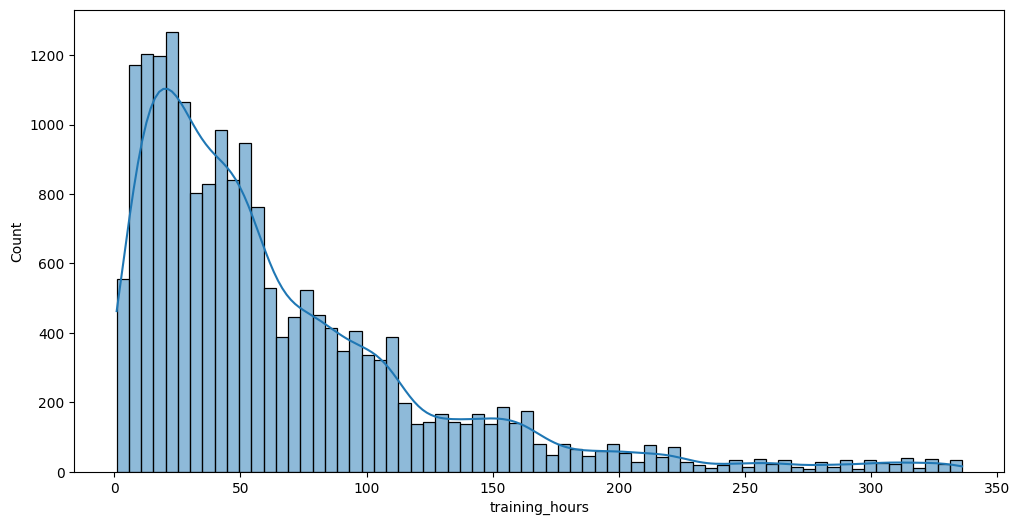

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['training_hours'], kde=True)

**Candidate total experience in years**




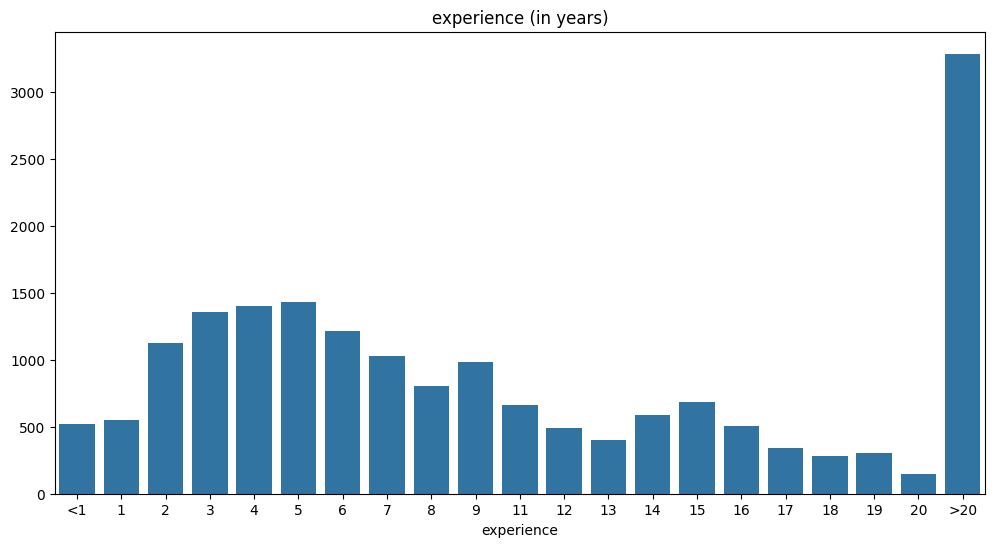

In [ ]:
plt.figure(figsize=(12, 6))
order = ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20']
plot_bar_graph('experience', order=order,)
plt.title("experience (in years)")
plt.show()

**Developement index of the city (scaled) Distribution**

In [ ]:
min_value = df['city_development_index'].min()
max_value = df['city_development_index'].max()
print(f"Nilai terkecil dalam kolom 'city_development_index': {min_value}")
print(f"Nilai terbesar dalam kolom 'city_development_index': {max_value}")

Nilai terkecil dalam kolom 'city_development_index': 0.4479999999999999
Nilai terbesar dalam kolom 'city_development_index': 0.949


<Axes: title={'center': 'city development index'}, xlabel='city_development_index', ylabel='Count'>

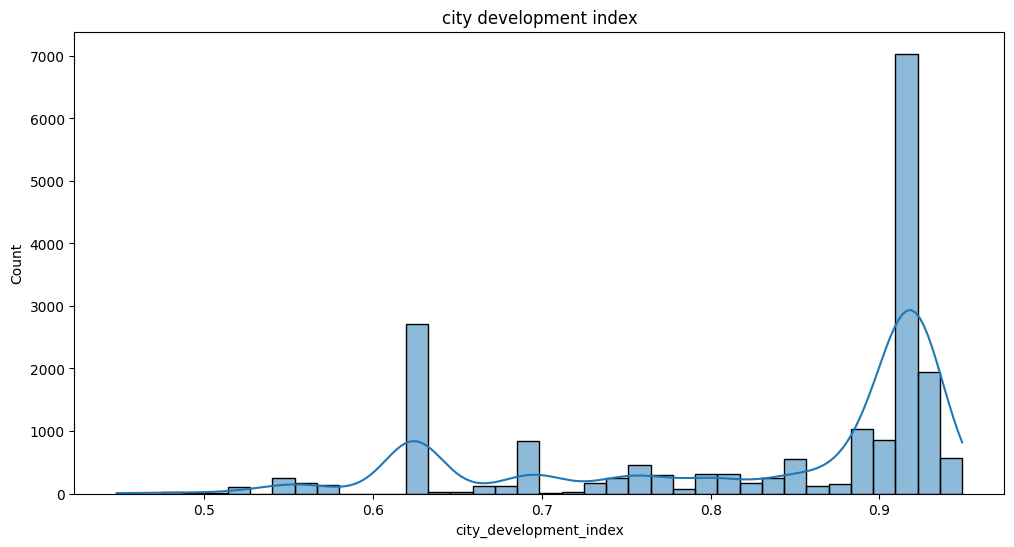

In [ ]:
plt.figure(figsize=(12, 6))
plt.title("city development index")
sns.histplot(df['city_development_index'], kde=True)

**Major Discipline**

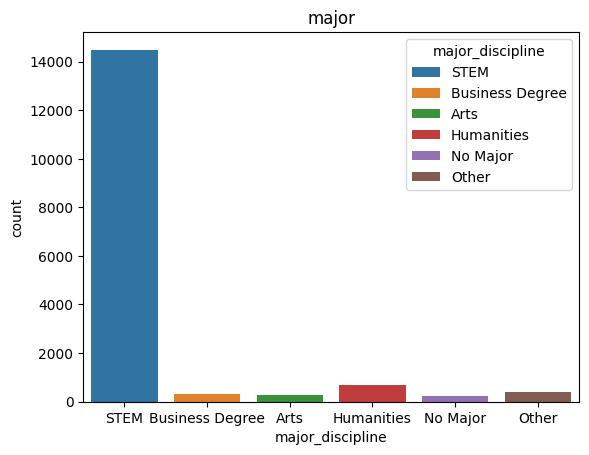

In [ ]:
sns.countplot(x='major_discipline', data=df, hue = "major_discipline")
plt.title("major")
plt.show()

**Education level distribution**

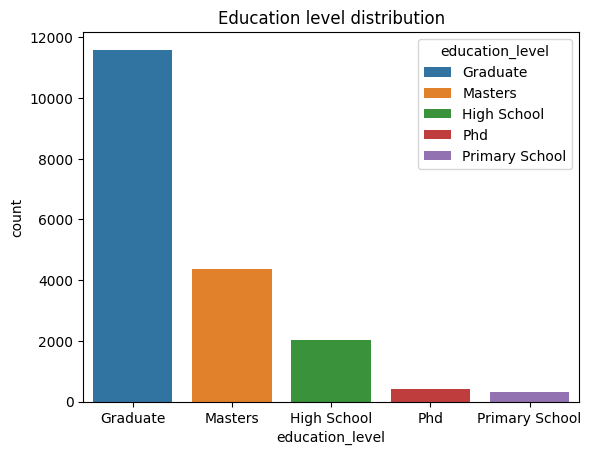

In [ ]:
sns.countplot(x='education_level', data=df, hue = "education_level")
plt.title("Education level distribution")
plt.show()

**Company size Distribution**

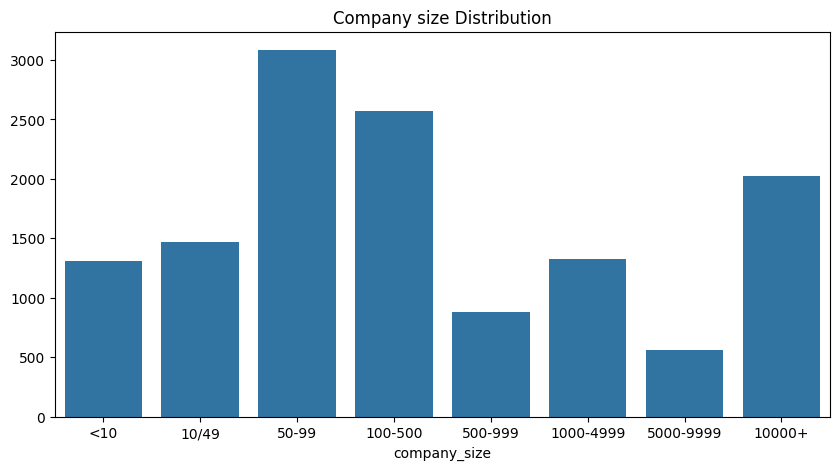

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Company size Distribution")
order = ['<10', '10/49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
plot_bar_graph('company_size', order=order,)
plt.show()

**Company type Distribution**

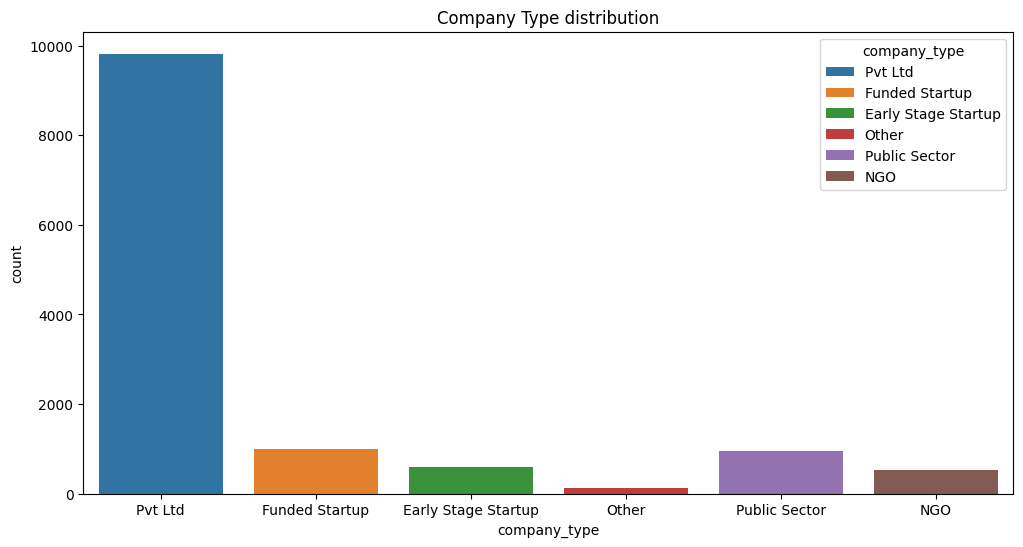

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='company_type', data=df, hue = "company_type")
plt.title("Company Type distribution")
plt.show()

**Difference in years between previous job and current job**

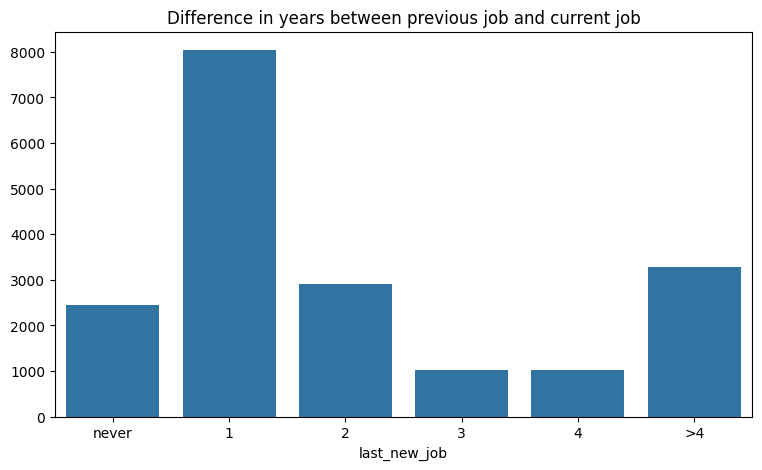

In [ ]:
plt.figure(figsize=(9, 5))
order = ['never', '1', '2', '3', '4', '>4']
plot_bar_graph('last_new_job', order=order)
plt.title("Difference in years between previous job and current job")
plt.show()

**Gender Distribution**

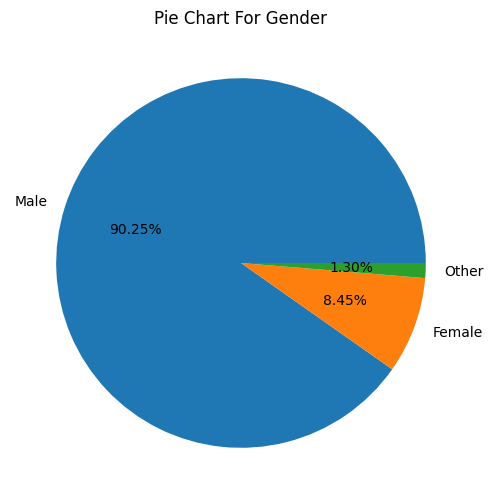

In [ ]:
plot_pie_chart('gender', title='Pie Chart For Gender')
plt.show()


**Relevent Experience**

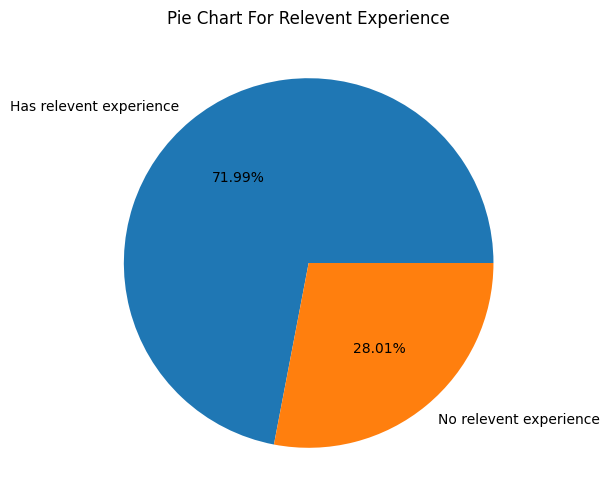

In [ ]:
plot_pie_chart('relevent_experience', title='Pie Chart For Relevent Experience')
plt.show()

**enrolled university distribution**

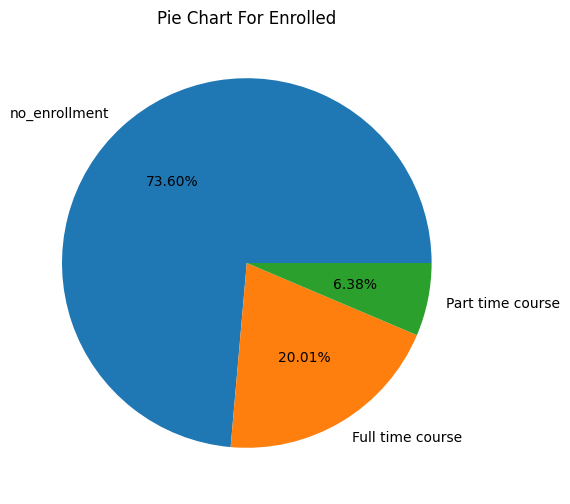

In [ ]:
plot_pie_chart('enrolled_university', title='Pie Chart For Enrolled')
plt.show()

**city by wordcloud**

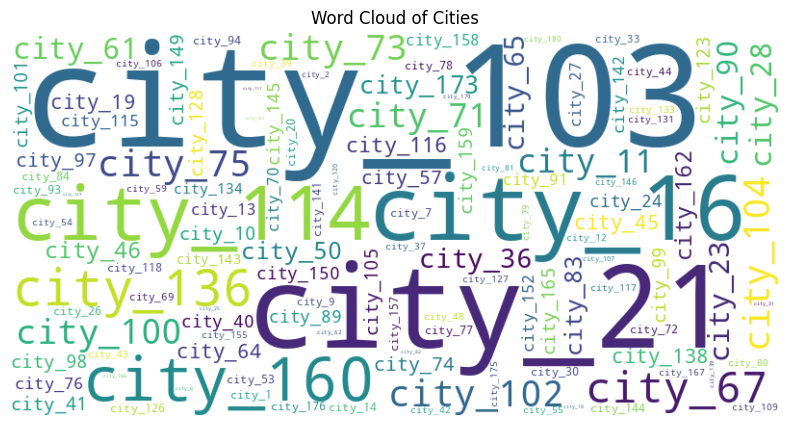

In [ ]:
def plot_word_cloud(column, title=''):
    text = ' '.join(df[column].astype(str).values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

plot_word_cloud('city', title='Word Cloud of Cities')

# Multivariate Analysis

## Based on education level

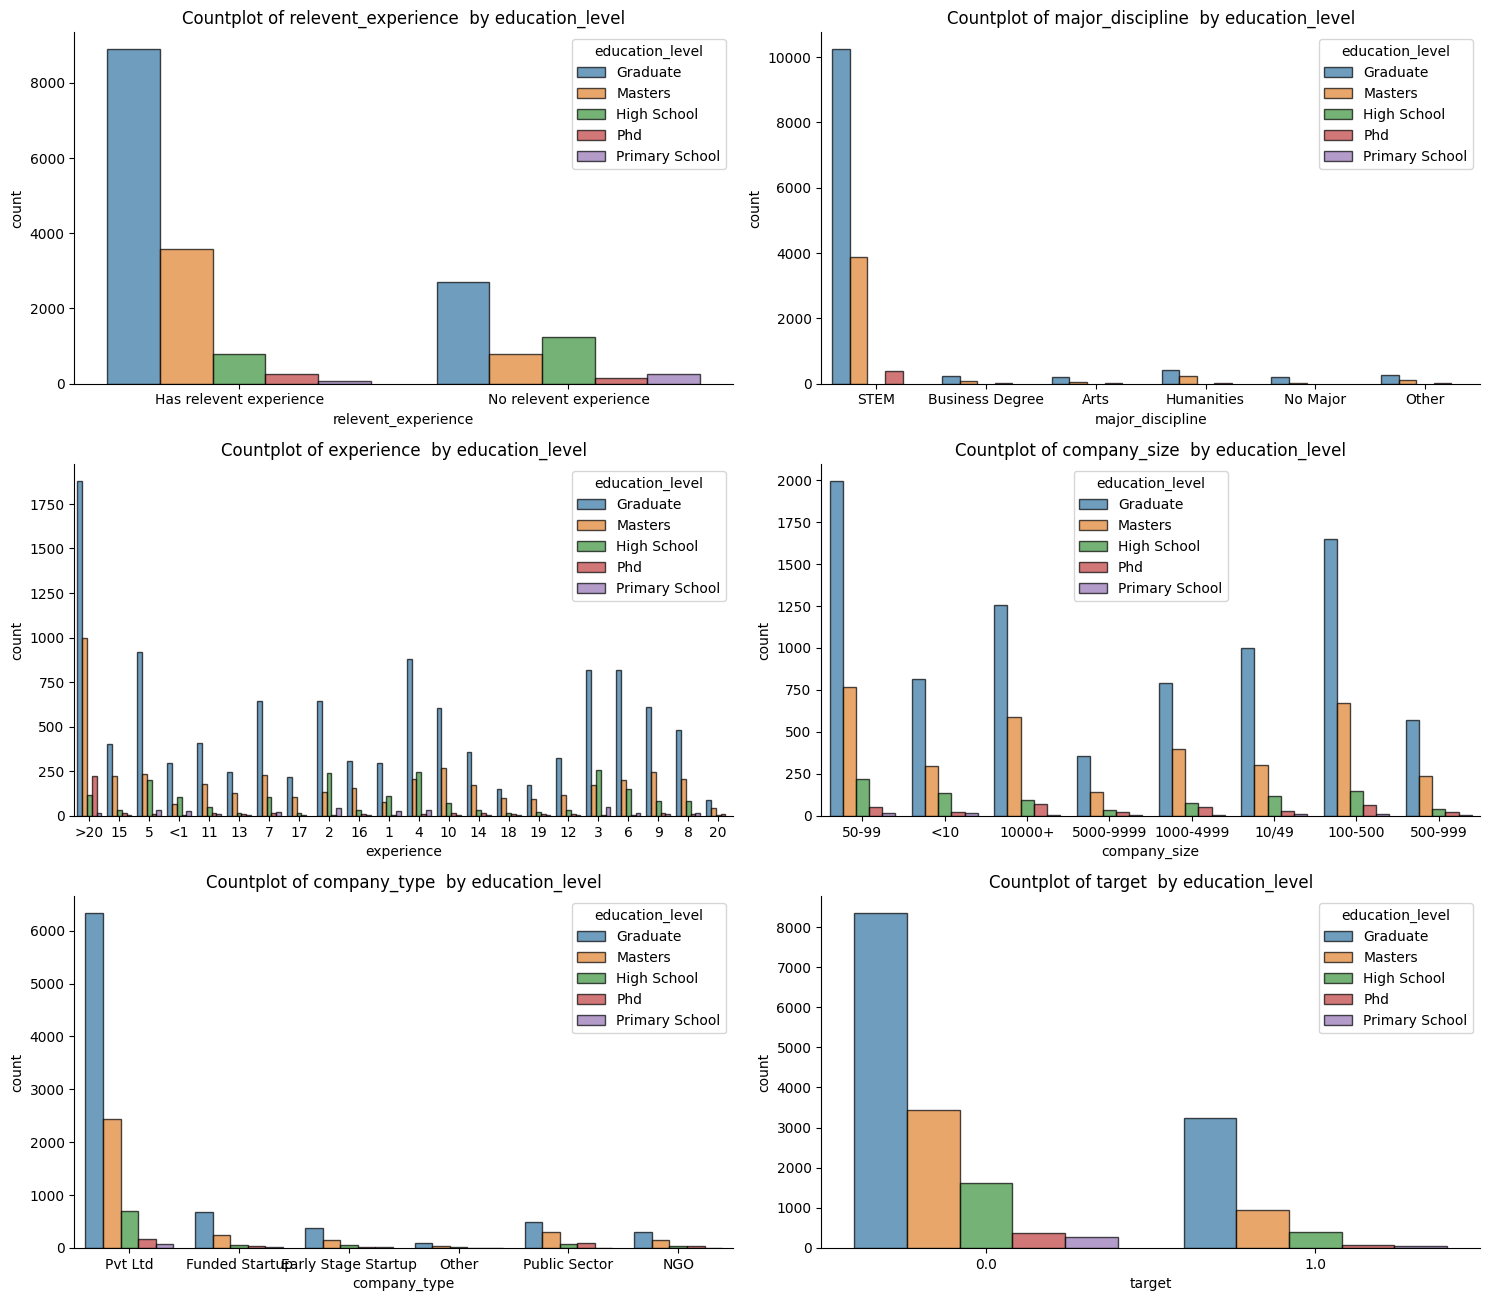

In [ ]:
plt.figure(figsize=[15,17])
fft=["relevent_experience", "major_discipline", "experience","company_size","company_type", "target"]
n=1
for f in fft:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='education_level', edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Countplot of {}  by education_level".format(f))
    n=n+1
plt.tight_layout()
plt.show()





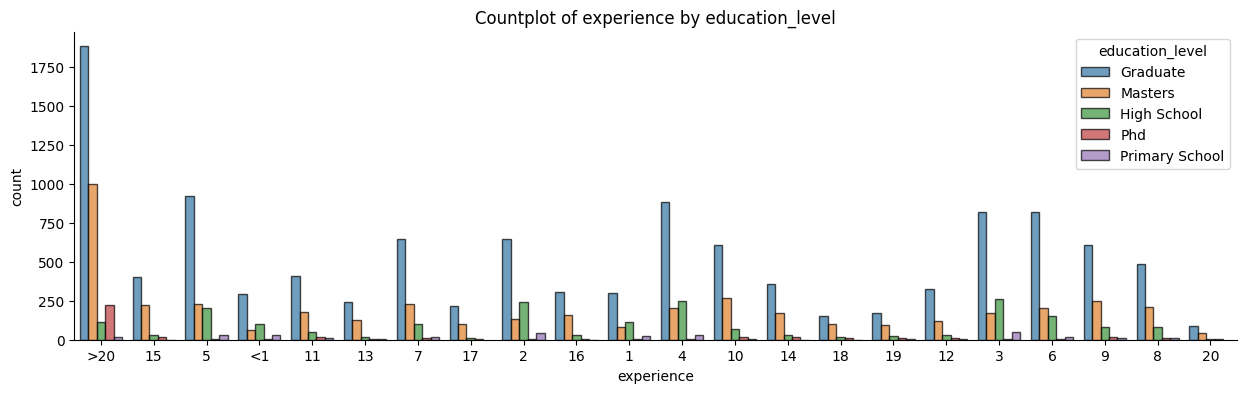

In [ ]:
plt.figure(figsize=[15,4])
sns.countplot(x='experience', hue='education_level',edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of experience by education_level")
plt.show()

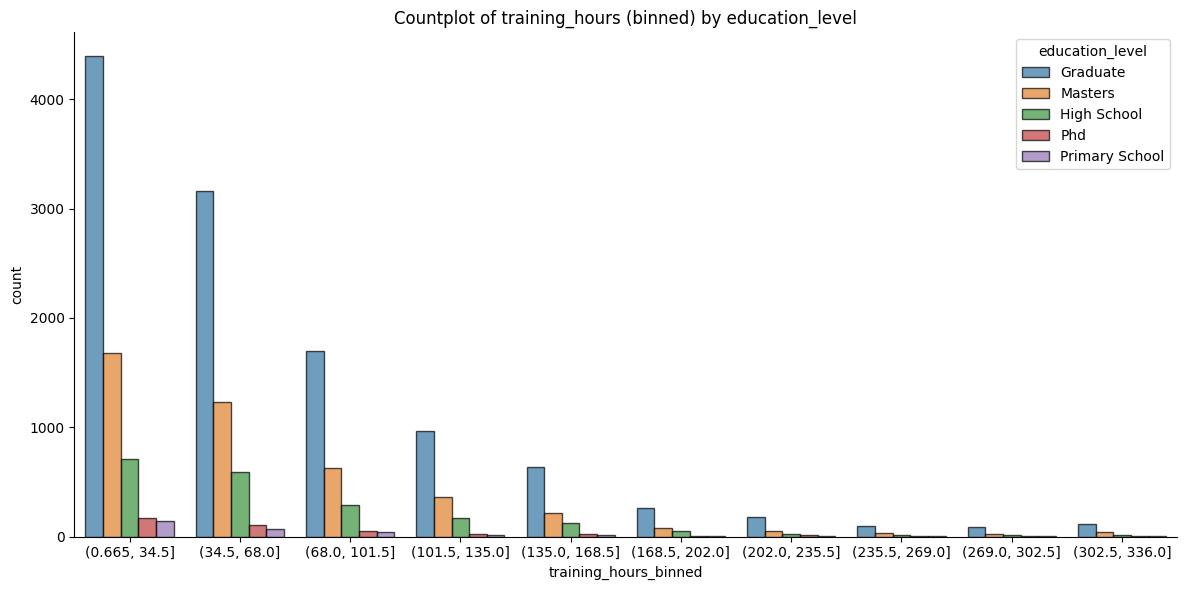

In [ ]:
df['training_hours_binned'] = pd.cut(df['training_hours'], bins=10)
plt.figure(figsize=[12, 6])
sns.countplot(x='training_hours_binned', hue='education_level', edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of training_hours (binned) by education_level")
plt.tight_layout()
plt.show()

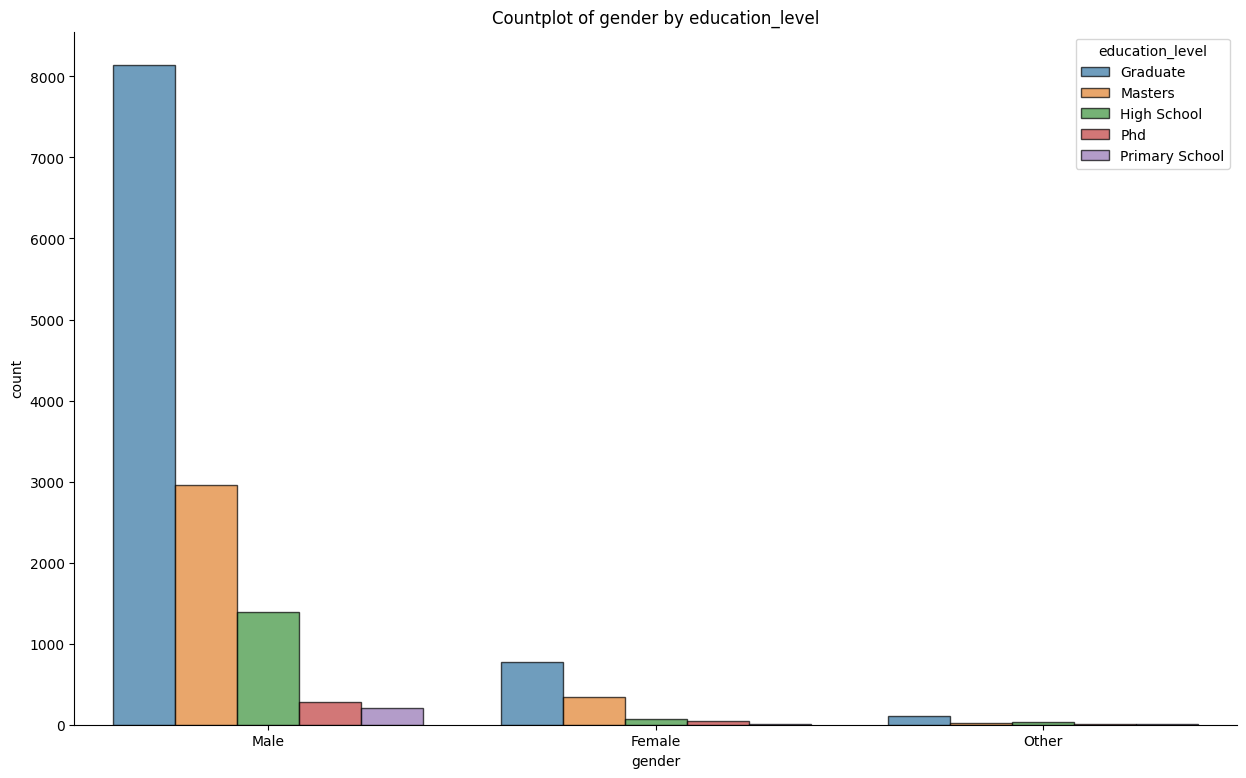

In [ ]:
plt.figure(figsize=[15,9])
sns.countplot(x='gender', hue='education_level',edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of gender by education_level")
plt.show()

## city by city development index

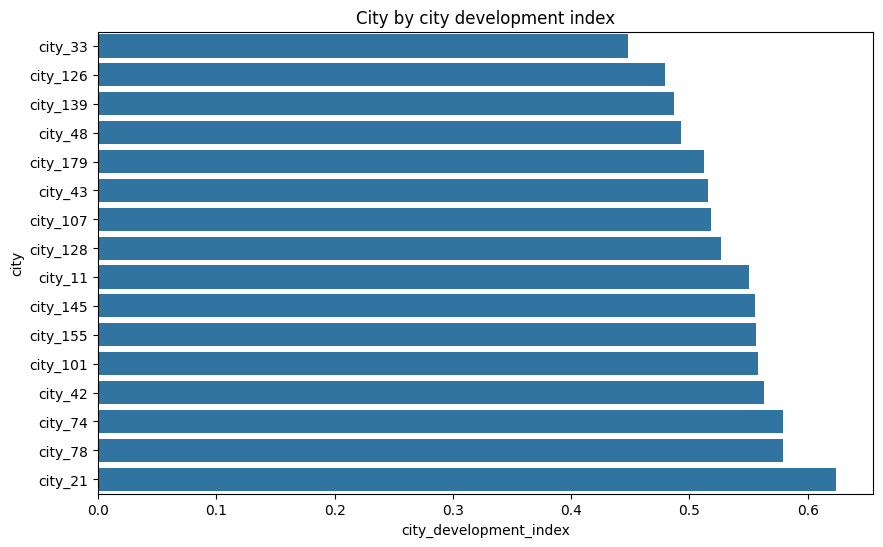

In [ ]:
cdi = df.sort_values(by='city_development_index', ascending=True)[:2000]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=cdi.city, x=cdi.city_development_index)
plt.xticks()
plt.xlabel('city_development_index')
plt.ylabel('city')
plt.title('City by city development index')
plt.show()

<Figure size 800x500 with 0 Axes>

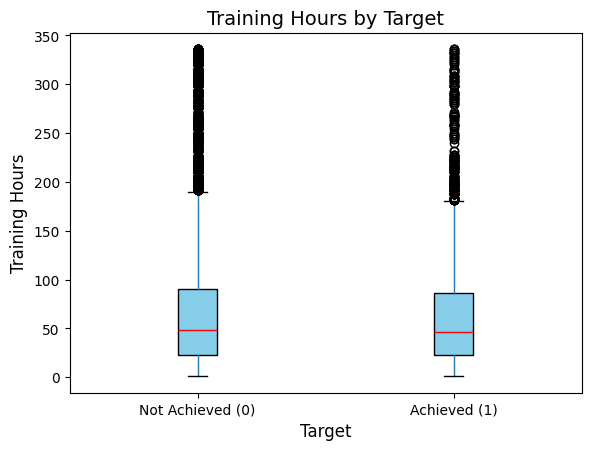

In [ ]:
plt.figure(figsize=(8, 5))
df.boxplot(column='training_hours', by='target', grid=False, patch_artist=True,
           boxprops=dict(facecolor='skyblue'), medianprops=dict(color='red'))
plt.title('Training Hours by Target', fontsize=14)
plt.suptitle('')  # Remove default title
plt.xlabel('Target', fontsize=12)
plt.ylabel('Training Hours', fontsize=12)
plt.xticks(ticks=[1, 2], labels=['Not Achieved (0)', 'Achieved (1)'], fontsize=10)
plt.show()

**Correlation in Data numerical**
* 1 indicates a strong positive relationship.
* -1 indicates a strong negative relationship.
* A result of zero indicates no relationship at all.

<Axes: >

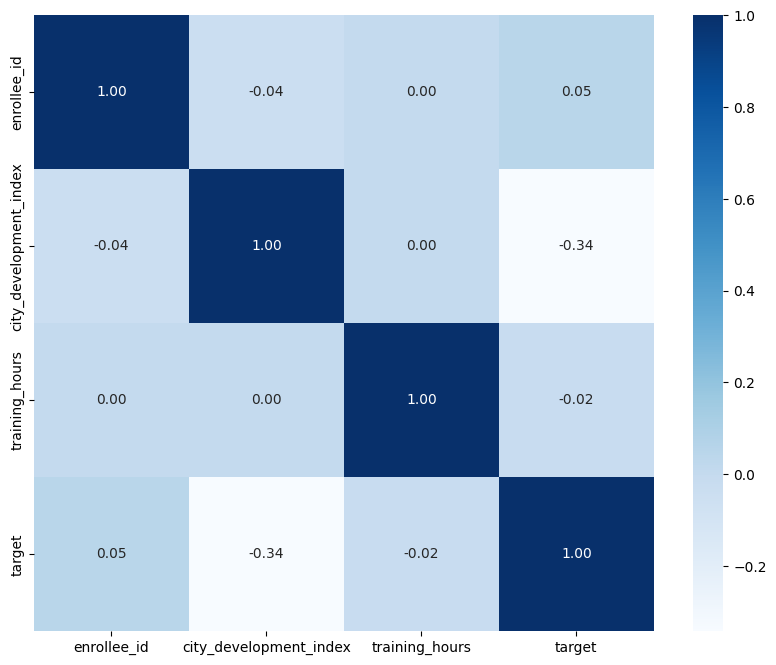

In [ ]:
numerical_data = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), cmap='Blues', annot=True, fmt='.2f')

# Preprocessing

In [ ]:
df.drop("enrollee_id",axis=1,inplace=True)

In [ ]:
# split the data to train and test
x_train,x_test,y_train,y_test=train_test_split(df.drop("target",axis=1),df["target"],shuffle=True,stratify=df["target"],random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((14368, 12), (4790, 12), (14368,), (4790,))

In [ ]:
# performe frquent encoder
city_freq=x_train["city"].value_counts(normalize=True)
x_train["city_freq"]=x_train["city"].map(city_freq)
x_train.drop("city",axis=1,inplace=True)

city_freq=x_test["city"].value_counts(normalize=True)
x_test["city_freq"]=x_test["city"].map(city_freq)
x_test.drop("city",axis=1,inplace=True)

In [ ]:
num_feat=x_train.iloc[:,:-1].select_dtypes("number").columns
cat_feat=x_train.select_dtypes("object").columns
print(num_feat)
print(cat_feat)

Index(['city_development_index', 'training_hours'], dtype='object')
Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')


In [ ]:
# Imputer for categorical features using the most frequent value (mode)
cat_imputer = SimpleImputer(strategy="most_frequent")

# One-Hot Encoder to convert categorical variables into binary vectors, dropping the first category to avoid multicollinearity
ohe = OneHotEncoder(drop="first")

# Pipeline to handle the preprocessing of categorical features:
# 1. Imputation of missing values using the most frequent category
# 2. Encoding of categorical variables using OneHotEncoder
cat_preproc = Pipeline(steps=[
    ("imputer", cat_imputer),
    ("encoder", ohe)
])

cat_preproc

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first'))])

In [ ]:
# Imputer for numerical features using the median value to handle missing values
num_imputer = SimpleImputer(strategy="median")

# Standard Scaler to normalize numerical features (zero mean, unit variance)
scaler = StandardScaler()

# Pipeline to handle the preprocessing of numerical features:
# 1. Imputation of missing values using the median
# 2. Scaling of numerical features using StandardScaler
num_imputer=SimpleImputer(strategy="median")
scaler=StandardScaler()
num_preproc=Pipeline(steps=[
    ("imputer",num_imputer),
    ("scaler",scaler)

])
num_preproc

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [ ]:
# ColumnTransformer to apply different preprocessing pipelines to different subsets of features
# 1. "cat" applies the cat_preproc pipeline to the categorical features (cat_feat)
# 2. "num" applies the num_preproc pipeline to the numerical features (num_feat)
column_transformer = ColumnTransformer(transformers=[
    ("cat", cat_preproc, cat_feat),  # Apply categorical preprocessing to categorical features
    ("num", num_preproc, num_feat)   # Apply numerical preprocessing to numerical features
])

column_transformer

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'))]),
                                 Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['city_development_index', 'training_hours'], dtype='object'))])

# MODELING

In [ ]:
# Dictionary containing different models to compare and choose the best one
# "RandomForest" uses RandomForestClassifier
# "Logistic" uses LogisticRegression
# "SvC" uses Support Vector Classifier (SVC)
models = {
    "RandomForest": RandomForestClassifier(),
    "Logistic": LogisticRegression(max_iter=1000),
    "SvC": SVC()
}

# List to store the cross-validation results for each model
results = []

# Iterate over each model in the dictionary
for model in models.values():
    # KFold cross-validator with 10 splits, shuffling the data, and setting a random state for reproducibility
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # Create a pipeline that combines the preprocessing steps and the model
    pipeline = Pipeline(steps=[
        ("preprocessing", column_transformer),  # Apply the column transformer to preprocess the data
        ("model", model)                        # Train the model on the preprocessed data
    ])

    # Perform cross-validation and calculate the scores for the current model
    cv_scores = cross_val_score(pipeline, x_train, y_train, cv=kf)

    # Append the cross-validation scores to the results list
    results.append(cv_scores)

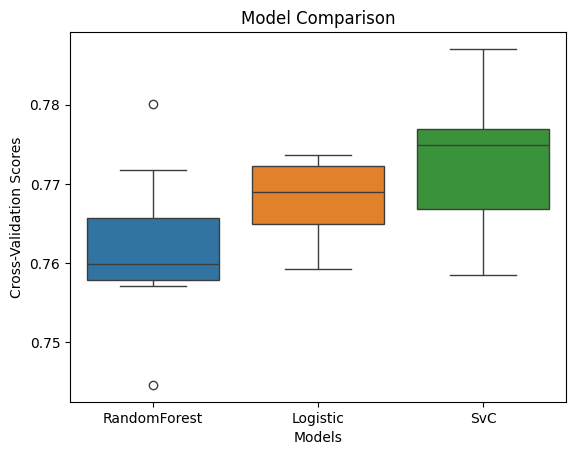

In [ ]:
# Given these observations, SVC appears to be the best model based on the higher median cross-validation score,
# even though it shows some variability. If you prioritize achieving the highest performance and can tolerate some variability,
# SVC would be the preferable choice.

sns.boxplot(data=results)
plt.xticks(ticks=range(len(models)), labels=models.keys())  # Correctly label the x-axis with model names
plt.ylabel("Cross-Validation Scores")
plt.xlabel("Models")
plt.title("Model Comparison")
plt.show()

#FINE TUNE SVC

In [ ]:
pipeline_svc = Pipeline(steps=[
    ("preprocessing", column_transformer),
    ("model", SVC(class_weight='balanced'))
])

param_grid = {
    'model__C': [1, 10, 50],
    'model__kernel': ['linear', 'rbf'],
    'model__gamma': ['scale', 0.01, 0.1],
}

kf = KFold(n_splits=3, shuffle=True, random_state=42)
best_model = GridSearchCV(pipeline_svc, param_grid=param_grid, cv=kf)

In [ ]:
best_model.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         Index(['gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline...
       'company_type', 'last_new_job'],
      dtype='object')),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['city_development_index', 'training_hours'], dtype='object'))])),
                                       ('model',
                                        SVC(class_weight='balanced'))]),
             param_grid={'model__C': [1, 10, 50],
                         'model__gamma': ['scale', 0.01, 0.1],
                         'model__kernel': ['linear', 'rbf']})

In [ ]:
y_pred=best_model.predict(x_test)

NameError: name 'best_model' is not defined

In [ ]:
y_pred = best_model.predict(x_test)
print("Hasil Prediksi:", y_pred[:10])  # Menampilkan 10 contoh pertama


Hasil Prediksi: [0. 1. 0. 0. 0. 0. 1. 1. 0. 1.]


In [ ]:
# Menghitung jumlah prediksi untuk setiap kelas
unique, counts = np.unique(y_pred, return_counts=True)
prediction_counts = dict(zip(unique, counts))



In [ ]:
# Menghitung total prediksi
total_predictions = len(y_pred)
# Menghitung persentase prediksi untuk setiap kelas
prediction_percentages = {cls: (count / total_predictions) * 100 for cls, count in prediction_counts.items()}

In [ ]:
# Menampilkan persentase prediksi
print("Persentase Prediksi:")
for cls, percentage in prediction_percentages.items():
    print(f"label {cls}: {percentage:.2f}%")



Persentase Prediksi:
label 0.0: 62.82%
label 1.0: 37.18%


0 = Not looking for job change\
1 = Looking for a job change

In [ ]:
# Menampilkan laporan klasifikasi
print("Hasil Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Not looking for job change', 'Looking for a job change']))

Hasil Klasifikasi:
                            precision    recall  f1-score   support

Not looking for job change       0.89      0.74      0.81      3596
  Looking for a job change       0.48      0.71      0.57      1194

                  accuracy                           0.73      4790
                 macro avg       0.68      0.73      0.69      4790
              weighted avg       0.78      0.73      0.75      4790



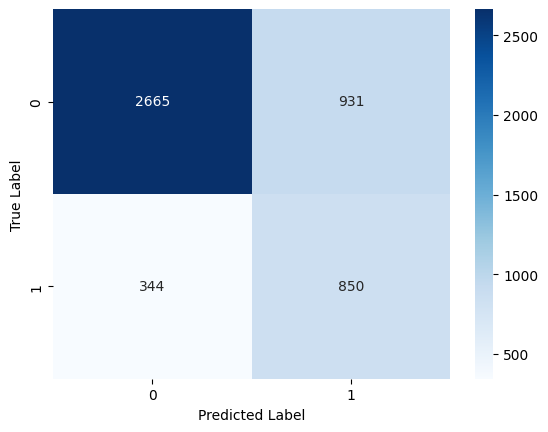

In [ ]:
# Cek confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Confusion matrix: Model berhasil mengidentifikasi 3.294 sampel negatif dengan benar (**True Negative**) dan 440 sampel positif dengan benar (**True Positive**). Namun, model juga  memprediksi 302 sampel negatif sebagai positif (**False Positive**) dan gagal mengenali 754 sampel positif sebagai negatif atau mengklasifikasikannya sebagai negatif (**False Negative**).

In [ ]:
# Cek distribusi target
print(df['target'].value_counts(normalize=True) * 100)  # Dalam persen
print(df['target'].value_counts())  # Dalam jumlah asli

target
0.0    75.065247
1.0    24.934753
Name: proportion, dtype: float64
target
0.0    14381
1.0     4777
Name: count, dtype: int64


In [ ]:
# Error analysis

# Buat DataFrame untuk melihat hasil prediksi vs label asli
error_analysis_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Filter kasus yang salah prediksi (misclassification)
misclassified = error_analysis_df[error_analysis_df['Actual'] != error_analysis_df['Predicted']]

# Jumlah kesalahan masing-masing kelas
print(misclassified['Actual'].value_counts())

# Beberapa sampel salah prediksi
print(misclassified.head(10))


Actual
0.0    931
1.0    344
Name: count, dtype: int64
       Actual  Predicted
8220      0.0        1.0
2807      1.0        0.0
13596     0.0        1.0
2380      0.0        1.0
15306     1.0        0.0
13293     0.0        1.0
12111     1.0        0.0
16463     1.0        0.0
15108     0.0        1.0
17808     1.0        0.0


Hasil setelah error analysis:
* 344 sampel dengan label asli 1.0 (Looking for a job change) diprediksi salah sebagai 0.0
* 931 sampel dengan label asli 0.0 (Not looking for a job change) diprediksi salah sebagai 1.0

Model lebih condong ke kelas mayoritas (0.0), yang berarti model mungkin kurang seimbang dalam menangani kelas minoritas.